# Сборный проект

## Описание проекта

Интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

##  Откроем файл с данными и изучим общую информацию


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
game=pd.read_csv('/datasets/games.csv')
game.info()
game.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
10631,Lode Runner 3-D,N64,1998.0,Action,0.08,0.02,0.00,0.00,NaN,NaN,NaN
3862,Frozen: Olaf's Quest,DS,2013.0,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
9304,Queen's Gate: Spiral Chaos,PSP,2011.0,Role-Playing,0.00,0.00,0.14,0.00,NaN,NaN,NaN
14407,Dodge Racing: Charger vs Challenger,DS,2009.0,Racing,0.03,0.00,0.00,0.00,NaN,tbd,E
16503,Shin Hayarigami 2,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
7681,Ratatouille,GBA,2007.0,Action,0.14,0.05,0.00,0.00,65.0,tbd,E
12297,July,DC,1998.0,Adventure,0.00,0.00,0.06,0.00,NaN,NaN,NaN
12251,Parlor! Mini 2,SNES,1996.0,Misc,0.00,0.00,0.07,0.00,NaN,NaN,NaN
10448,Pro Yakyuu Famista DS 2009,DS,2009.0,Sports,0.00,0.00,0.10,0.00,NaN,NaN,NaN
10736,Natural Doctrine,PS4,2014.0,Role-Playing,0.05,0.02,0.02,0.01,53.0,6,M


In [3]:
game.duplicated().sum()

0

Описание данных

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). 

Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

In [4]:
game.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

1. Привести названия и строки к нижнему регистру 
2. Заполнить пропуски в столбцах name,genre,user_score,critic_score,rating
3. Преобразовать типы данных в столбцах year_of_release,user_score,citic_score
4. Посчитать суммарные продажи во всех регионах и дбавить в новый столбец total_price

### Привести названия и строки к нижнему регистру

In [5]:
game.columns = game.columns.str.lower()

In [6]:
game['name'] = game['name'].str.lower()
game['platform'] = game['platform'].str.lower()
game['genre'] = game['genre'].str.lower()

### Заполнить пропуски

Пропуски в столбцах :

name - 2 пропуска , удаляем , сильно на анализ не повлияют

genre -  2 пропуска , удаляем , сильно на анализ не повлияют

year_of_release - возможно , пропуски появились из-за выгрузки данных , заменим Nan на -1 

critic_score - возможно , оценка критика была не актуальной или не было возможности ее поставить ,заменим Nan на  -1 , чтобы не перепустать с настоящими данными, пропусков много.

user_score - аналогично critic_score.

rating_esrb - возможно , для того , чтобы поставить рейтинг не было возможности или же не блыло организации которая этим бы занималась , заменим пропуски на no_rating.

In [7]:
game.loc[game['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
game=game.loc[~game['name'].isna()]

In [9]:
for column in ['critic_score', 'rating']:
    game.loc[game[column].isna(),column]=-1

 'tbd' фактически и является NaN, заменим и NaN

In [10]:
game.loc[game['user_score'] == 'tbd','user_score'] = np.nan

In [11]:
for column in ['user_score']:
    game.loc[game[column].isna(),column]=-1

In [12]:
game['year_of_release'].fillna(-1, inplace=True)

In [13]:
game.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [14]:
game['rating'].value_counts()

-1      6764
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [15]:
game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Почистили файл от пропусков 

Заменили nan в столбцах 'user_score','critic_score','rating' на значение '-1'


### Преобразовать типы данных

In [16]:
game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [17]:
game.loc[:,'year_of_release'] = game.loc[:,'year_of_release'].astype('Int64',errors='ignore')

In [18]:
game['user_score'] = game['user_score'].astype('float')
game['critic_score'] = game['critic_score'].astype('float')

In [19]:
game.info()
game.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000
mean,1974.175253,0.263302,0.145045,0.077625,0.047343,33.064920,2.689888
std,252.700771,0.813565,0.503359,0.308871,0.186742,36.299815,4.169887
min,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,-1.000000,-1.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


Преобразовали типы данных в датафрейме для удобства дальнейшей работы 'yaer_of_release' - int, 'user_score' & 'critic_score' - float .

### Посчитать суммарные продажи во всех регионах и дбавить в новый столбец

In [20]:
game['total_price']= game['na_sales'] + game['eu_sales'] + game['jp_sales'] + game['other_sales']

In [21]:
game.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_price
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.0,-1.0,-1,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.0,-1.0,-1,31.38


## Проведем исследовательский анализ данных

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?


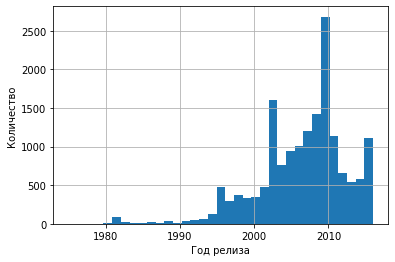

In [22]:
game['year_of_release'].hist(bins=35,range=(1975,2016)).set(xlabel='Год релиза', ylabel='Количество');

Появились игры в 80-ых , но затем длительное затишье , рост видеоплатформ начиная с 90-ых до 2003 года постепенно начал набирать обороты так же , наблюдаем  спад рынка после 2010 ( с переходом на мобильные платформы ) , больше всего игр было выпущенно в период с 2003-2012 год .

В дальнейшем исследовании мы будем рассматривать только важный для нас период с 2013 года .

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [ ]:
game = game.query('year_of_release != -1').copy()
game = game.query('user_score != -1').copy()
game = game.query('critic_score != -1').copy()
#game = game.query('rating != -1').copy()

In [ ]:
plt=game.pivot_table('total_price',index='platform',aggfunc='sum').sort_values(by='total_price',ascending=False).head(20)

In [ ]:
plt.plot(kind='bar',figsize=(10,5),grid=True).set(xlabel='Платформа', ylabel='Количество продаж');

В лидеры по продажам игр вышли платформы , как: ps2,x360,ps3,wii,ds.

ОБЬЕМ ПРОДАЖ НА КАЖДУЮ ПЛАТФОРМУ

Актуальные платформы

In [ ]:
game=game.query("platform==('ps2','ps4', '3ds', 'xone', 'wiiu', 'ps3', 'pc', 'x360', 'psv', 'wii')")
game

In [ ]:
def show_lines(data, year, title):
    sns.lineplot(x='year_of_release',y='total_price',hue='platform',markers=True,data=(game.query('year_of_release >= @year')             
                      .groupby(['platform','year_of_release'])['total_price']   
                      .agg('sum')                                             
                      .reset_index()
                     )
                )
show_lines(game.query('platform in @game'), 
           2000, 
           'Продажи популярных игровых платформ')

В среднем все игровые платформы существуют 10 лет . Пик наступает примерно через 5 лет после выпуска .

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.


Будем рассматривать данные начиная с 2013 года

In [ ]:
game = (game[game['year_of_release']>=2013])

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [ ]:
game.query("platform==('ps2','ps4','3ds','xone','wiiu')")

In [ ]:
game.pivot_table(index='platform',values='total_price',aggfunc='sum').sort_values('total_price', ascending = False).plot(y='total_price', kind='bar',grid=True, color='orange', alpha=0.5, legend=False);


Начиная с 2010 года лидером по продажам становится ps4 , на вторую ступень лидерства выходит xone  .

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [ ]:
sns.set(style="ticks")
ax = sns.boxplot(data=game, y="total_price", x='platform')
ax.set_title('Распределение глобальных продаж по плаформам', fontsize=20)
ax.set_xlabel('Игровая платформа', fontsize=15)
ax.set_ylabel('Глобальные продажи', fontsize=15)
ax.set(yscale="log");

Лидером глобальным продажам  за игру в период с 2013 по 2016 год являются ps4 , xone, pc.

3ds,ps3,x360,psv,wiiu - не могут похвастаться обьемными продажами в период с 2013 по 2016 г.

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.


In [ ]:
ps4 = game.query("platform == 'ps4'")
xone = game.query("platform == 'xone'")

In [ ]:
features = ['user_score', 'critic_score', 'total_price']
ps4[features].corr()

Взаимосвязь между оценками критоков и глобальными продажами есть 0.4
Взаимосвязь между оценками пользователей  и глобальными продажами отсутсвует -0.03

In [ ]:
xone[features].corr()

Взаимосвязь между оценками критоков и глобальными продажами есть 0.4
Взаимосвязь между оценками пользователей  и глобальными продажами отсутсвует -0.09

In [ ]:
ps4.plot(x='user_score', y='total_price', kind='scatter', title='ps4');
xone.plot(x='user_score', y='total_price', kind='scatter', title='xbox one', color='green');

In [ ]:
ps4.plot(x='critic_score', y='total_price', kind='scatter', title='ps4');
xone.plot(x='critic_score', y='total_price', kind='scatter', title='xbox one', color='green');

Игры на xbox, добившиеся высоких продаж, в среднем имеют более высокий рейтинг, чем игры с аналогичными продажами на pS4.

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [ ]:
(game
    .pivot_table(index='genre', values='total_price')
    .sort_values('total_price', ascending=False)
    .plot(kind='bar', y='total_price', figsize=(10, 5), legend=False)
    .set(xlabel='Жанр', ylabel='Глобальные продажи'));


Самые популярные жанры - шутер,спортивные игры. На последних местах стратегии и квесты.

## Составим портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):

# NA sales

ТОП 5 ЖАНРОВ

In [ ]:
game.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar');
game.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar');
game.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar');

Экшн окозался самым популярным жанром среди всех , шутер на втором месте по популярности .

ТОП 5 ПЛАТФОРМ

In [ ]:
game.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar');
game.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar');
game.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar');

В основном ps4 лидирует в выборе пользователей , на вотором месте xone , ps3

РЕЙТИНГ ESRB

In [ ]:
game.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar');
game.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar');
game.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar');

Большинство игр покупают с рейтингом E (Для всех) и M(для взрослых) .

## Проверим гипотезы

Гипотезы:

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1: Средние пользовательские рейтинги платформ Xbox One и PC различается

In [ ]:
xone = game[(game['platform'] == 'xone') & (game['user_score'] > -1)]['user_score']
pc = game[(game['platform'] == 'pc') & (game['user_score'] > -1)]['user_score']

In [ ]:

alpha = 0.05

results = st.ttest_ind(xone, pc,equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Гипотеза , что средние пользовательские рейтинги платформ Xbox One и PC одинаковые - подтвердилась.

H0: Cредние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковые

H1: Cредние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные

In [ ]:
action = game[(game['genre'] == 'action') & (game['user_score'] > -1)]['user_score']
sports = game[(game['genre'] == 'sports') & (game['user_score'] > -1)]['user_score']

In [ ]:
alpha = 0.05

results = st.ttest_ind(action,sports,equal_var=False,nan_policy='omit')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые не подтвердилась.

 ## Напишем общий вывод

Платформы имеют спад после 2013 года , но люди не перестают играть

Самые популярные платформы - ps4 , xone , они так же имеют потенциал роста

Лидеры продаж являются игры с жанрами - шутер и спорт.игры 

На продажи влияют оценки критиков , на что стоит обратить внимание 

Стоит обратить внимание на Японию , игры с рейтингом Т(для подростков) на одном уровне с рейтингами М и Е 